In [1]:
import pandas as pd
from ema_workbench import load_results
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_base = pd.read_csv("results/base_case_without_NaN.csv")
df_base.drop(columns=["Unnamed: 0"],inplace=True)
df_base   

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,4.036285e+06,0,0.004364,4.554415e+07,0,0.062144,0.000000e+00,0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,15,base case no policy,dikesnet
1,7.620287e+08,0,0.611532,1.492923e+08,0,0.151080,3.023840e+08,0,0.593600,4.911416e+05,...,0,0,0,0,0,0,0,16,base case no policy,dikesnet
2,9.085729e+08,0,0.581077,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,17,base case no policy,dikesnet
3,9.286149e+07,0,0.048993,7.073281e+07,0,0.048694,4.188630e+06,0,0.005671,1.175439e+06,...,0,0,0,0,0,0,0,18,base case no policy,dikesnet
4,0.000000e+00,0,0.000000,7.091085e+07,0,0.078947,0.000000e+00,0,0.000000,3.294457e+07,...,0,0,0,0,0,0,0,19,base case no policy,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,3.439976e+07,0,0.029896,2.361895e+07,0,0.027094,5.379326e+08,0,1.100780,0.000000e+00,...,0,0,0,0,0,0,0,995,base case no policy,dikesnet
981,4.239234e+07,0,0.029252,1.252469e+07,0,0.011620,2.195979e+07,0,0.038689,1.365650e+07,...,0,0,0,0,0,0,0,996,base case no policy,dikesnet
982,9.373940e+08,0,0.596218,5.252359e+06,0,0.004693,0.000000e+00,0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,997,base case no policy,dikesnet
983,9.102235e+07,0,0.047832,3.972179e+08,0,0.252305,0.000000e+00,0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,998,base case no policy,dikesnet


In [3]:
def aggregate_df(df):
    df_aggregate = pd.DataFrame()
    locations = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']
    step = ['0', '1', '2']
    metrics = ['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
    
    for metric in metrics:
        if metric == "RfR Total Costs" or metric == "Expected Evacuation Costs":

            columns = [metric + ' ' + time for time in step]

            df_aggregate[metric] = df[columns].sum(axis=1)
        else:
            for location in locations:
                columns = [location + '_' + metric + ' ' + time for time in step]

                df_aggregate[location + '_' + metric] = df[columns].sum(axis=1)
            
            columns_locations = [location + '_' + metric for location in locations]
            df_aggregate['Total ' + metric] = df_aggregate[columns_locations].sum(axis=1)
    
 
    return df_aggregate

In [4]:
df_base_agg = aggregate_df(df_base)
df_base_agg

,A.1_Expected Annual Damage,A.2_Expected Annual Damage,A.3_Expected Annual Damage,A.4_Expected Annual Damage,A.5_Expected Annual Damage,Total Expected Annual Damage,A.1_Dike Investment Costs,A.2_Dike Investment Costs,A.3_Dike Investment Costs,A.4_Dike Investment Costs,A.5_Dike Investment Costs,Total Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Number of Deaths,A.3_Expected Number of Deaths,A.4_Expected Number of Deaths,A.5_Expected Number of Deaths,Total Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.513913e+07,1.708251e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.859643e+08,0,0,0,0,0,0,0.013092,0.186432,0.000000,0.000000,0.000000,0.199524,0.0,0.0
1,2.148814e+09,4.209833e+08,8.526804e+08,1.384951e+06,0.000000e+00,3.423863e+09,0,0,0,0,0,0,1.834596,0.453239,1.780801,0.000677,0.000000,4.069313,0.0,0.0
2,2.725719e+09,0.000000e+00,0.000000e+00,0.000000e+00,7.301715e+07,2.798736e+09,0,0,0,0,0,0,1.743231,0.000000,0.000000,0.000000,0.057468,1.800699,0.0,0.0
3,2.573204e+08,1.960015e+08,1.160675e+07,3.257158e+06,8.911282e+06,4.770971e+08,0,0,0,0,0,0,0.146978,0.146081,0.017012,0.001235,0.006422,0.317728,0.0,0.0
4,0.000000e+00,2.180577e+08,0.000000e+00,1.013077e+08,0.000000e+00,3.193655e+08,0,0,0,0,0,0,0.000000,0.236840,0.000000,0.051947,0.000000,0.288788,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9.700251e+07,6.660214e+07,1.516895e+09,0.000000e+00,0.000000e+00,1.680499e+09,0,0,0,0,0,0,0.089689,0.081283,3.302341,0.000000,0.000000,3.473313,0.0,0.0
981,1.038533e+08,3.068315e+07,5.379741e+07,3.345590e+07,1.925016e+07,2.410400e+08,0,0,0,0,0,0,0.087755,0.034861,0.116068,0.019041,0.020680,0.278405,0.0,0.0
982,2.487048e+09,1.393530e+07,0.000000e+00,0.000000e+00,2.029642e+08,2.703948e+09,0,0,0,0,0,0,1.788654,0.014080,0.000000,0.000000,0.193989,1.996724,0.0,0.0
983,2.278825e+08,9.944699e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.222352e+09,0,0,0,0,0,0,0.143495,0.756916,0.000000,0.000000,0.000000,0.900411,0.0,0.0


## Load the results from basecase and open exploration with policies and combine into one df

In [5]:
experiments_p, outcomes_p = load_results('results/policies_fully_disaggregated.tar.gz')
df_outcomes_p = pd.DataFrame.from_dict(outcomes_p)
df_experiments_p = pd.DataFrame.from_dict(experiments_p)
df_pol = df_outcomes_p.join(df_experiments_p)
df_pol

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0.000000e+00,8.526436e+07,0.000000,5.302356e+07,0,0.005742,0.0,3.139880e+07,0.0,1.069181e+07,...,1.0,4.0,2.0,2.0,3.0,4.0,4.0,0,0,dikesnet
1,0.000000e+00,8.526436e+07,0.000000,1.357645e+06,0,0.000244,0.0,3.139880e+07,0.0,8.357101e+05,...,1.0,4.0,2.0,2.0,3.0,4.0,4.0,1,0,dikesnet
2,0.000000e+00,8.526436e+07,0.000000,2.171279e+07,0,0.002411,0.0,3.139880e+07,0.0,0.000000e+00,...,1.0,4.0,2.0,2.0,3.0,4.0,4.0,2,0,dikesnet
3,0.000000e+00,8.526436e+07,0.000000,2.157793e+07,0,0.003005,0.0,3.139880e+07,0.0,0.000000e+00,...,1.0,4.0,2.0,2.0,3.0,4.0,4.0,3,0,dikesnet
4,0.000000e+00,8.526436e+07,0.000000,6.413019e+07,0,0.008581,0.0,3.139880e+07,0.0,0.000000e+00,...,1.0,4.0,2.0,2.0,3.0,4.0,4.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.000000e+00,0.000000e+00,0.000000,1.287416e+06,59410102,0.000276,0.0,3.422156e+07,0.0,0.000000e+00,...,7.0,7.0,7.0,10.0,8.0,1.0,2.0,395,99,dikesnet
39996,0.000000e+00,0.000000e+00,0.000000,3.102785e+05,59410102,0.000044,0.0,3.422156e+07,0.0,0.000000e+00,...,7.0,7.0,7.0,10.0,8.0,1.0,2.0,396,99,dikesnet
39997,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,59410102,0.000000,0.0,3.422156e+07,0.0,4.155308e+05,...,7.0,7.0,7.0,10.0,8.0,1.0,2.0,397,99,dikesnet
39998,6.111999e+08,0.000000e+00,0.087021,0.000000e+00,59410102,0.000000,0.0,3.422156e+07,0.0,0.000000e+00,...,7.0,7.0,7.0,10.0,8.0,1.0,2.0,398,99,dikesnet


In [6]:
# add a column indicating basecase or random and join the outcomes 
# to one file
df_base['Policy'] = 'basecase'
df_pol['Policy'] = 'random'
df_unaggregated = df_base.append(df_pol)
df_unaggregated

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Policy
0,4.036285e+06,0.0,0.004364,4.554415e+07,0,0.062144,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,15,base case no policy,dikesnet,basecase
1,7.620287e+08,0.0,0.611532,1.492923e+08,0,0.151080,3.023840e+08,0.000000e+00,0.593600,4.911416e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,16,base case no policy,dikesnet,basecase
2,9.085729e+08,0.0,0.581077,0.000000e+00,0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,17,base case no policy,dikesnet,basecase
3,9.286149e+07,0.0,0.048993,7.073281e+07,0,0.048694,4.188630e+06,0.000000e+00,0.005671,1.175439e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,18,base case no policy,dikesnet,basecase
4,0.000000e+00,0.0,0.000000,7.091085e+07,0,0.078947,0.000000e+00,0.000000e+00,0.000000,3.294457e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,19,base case no policy,dikesnet,basecase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.000000e+00,0.0,0.000000,1.287416e+06,59410102,0.000276,0.000000e+00,3.422156e+07,0.000000,0.000000e+00,...,7.0,7.0,7.0,10.0,8.0,1.0,395,99,dikesnet,random
39996,0.000000e+00,0.0,0.000000,3.102785e+05,59410102,0.000044,0.000000e+00,3.422156e+07,0.000000,0.000000e+00,...,7.0,7.0,7.0,10.0,8.0,1.0,396,99,dikesnet,random
39997,0.000000e+00,0.0,0.000000,0.000000e+00,59410102,0.000000,0.000000e+00,3.422156e+07,0.000000,4.155308e+05,...,7.0,7.0,7.0,10.0,8.0,1.0,397,99,dikesnet,random
39998,6.111999e+08,0.0,0.087021,0.000000e+00,59410102,0.000000,0.000000e+00,3.422156e+07,0.000000,0.000000e+00,...,7.0,7.0,7.0,10.0,8.0,1.0,398,99,dikesnet,random


Now that we have everything in a single dataframe, we want to aggregate over time. In our analysis, we have decided to not include the time aspect. The model does not capture the outcomes of interest with high granularity, so we have deemed it as not important.

We have defined the following objectives to be of interest:

•	A.1 Expected Annual Damage \
•	A.1 Dike Investment Costs \
•	A.1 Expected Annual Number of Deaths \
•	Total Expected Annual Number of Deaths \
•	Total Annual Damage 

Obviously the outcomes directly affecting Dike Ring 1 are of major concern to the Dike Ring. However, having a significant number of casualties or damage to the rest of the Netherlands will be very disruptive, so that is also something that should be avoided. Seeing as the last two objectives are not output by the model directly, we develop a function that aggregates over time and location

In [7]:
# function to aggregate over time and locations
def aggregate_df(df):
    df_aggregate = pd.DataFrame()
    locations = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']
    step = ['0', '1', '2']
    metrics = ['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
    
    for metric in metrics:
        if metric == "RfR Total Costs" or metric == "Expected Evacuation Costs":

            columns = [metric + ' ' + time for time in step]

            df_aggregate[metric] = df[columns].sum(axis=1)
        else:
            for location in locations:
                columns = [location + '_' + metric + ' ' + time for time in step]

                df_aggregate[location + '_' + metric] = df[columns].sum(axis=1)
            
            columns_locations = [location + '_' + metric for location in locations]
            df_aggregate['Total ' + metric] = df_aggregate[columns_locations].sum(axis=1)
    
 
    return df_aggregate

In [8]:
df = aggregate_df(df_unaggregated)

In [9]:
df

,A.1_Expected Annual Damage,A.2_Expected Annual Damage,A.3_Expected Annual Damage,A.4_Expected Annual Damage,A.5_Expected Annual Damage,Total Expected Annual Damage,A.1_Dike Investment Costs,A.2_Dike Investment Costs,A.3_Dike Investment Costs,A.4_Dike Investment Costs,A.5_Dike Investment Costs,Total Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Number of Deaths,A.3_Expected Number of Deaths,A.4_Expected Number of Deaths,A.5_Expected Number of Deaths,Total Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.513913e+07,1.708251e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.859643e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.013092,0.186432,0.000000,0.000000,0.000000,0.199524,0.0,0.000000
1,2.148814e+09,4.209833e+08,8.526804e+08,1.384951e+06,0.000000e+00,3.423863e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.834596,0.453239,1.780801,0.000677,0.000000,4.069313,0.0,0.000000
2,2.725719e+09,0.000000e+00,0.000000e+00,0.000000e+00,7.301715e+07,2.798736e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.743231,0.000000,0.000000,0.000000,0.057468,1.800699,0.0,0.000000
3,2.573204e+08,1.960015e+08,1.160675e+07,3.257158e+06,8.911282e+06,4.770971e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.146978,0.146081,0.017012,0.001235,0.006422,0.317728,0.0,0.000000
4,0.000000e+00,2.180577e+08,0.000000e+00,1.013077e+08,0.000000e+00,3.193655e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.236840,0.000000,0.051947,0.000000,0.288788,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.000000e+00,1.287416e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.287416e+06,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,1.718341e+08,6.466720e+08,0.000000,0.000276,0.000000,0.000000,0.000000,0.000276,931300000.0,83.565852
39996,0.000000e+00,3.102785e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.102785e+05,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,1.718341e+08,6.466720e+08,0.000000,0.000044,0.000000,0.000000,0.000000,0.000044,931300000.0,13.139235
39997,0.000000e+00,0.000000e+00,0.000000e+00,4.155308e+05,0.000000e+00,4.155308e+05,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,1.718341e+08,6.466720e+08,0.000000,0.000000,0.000000,0.000039,0.000000,0.000039,931300000.0,28.336502
39998,6.111999e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.111999e+08,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,1.718341e+08,6.466720e+08,0.087021,0.000000,0.000000,0.000000,0.000000,0.087021,931300000.0,8437.491483


In [10]:
df['Policy'] = df_unaggregated['Policy']
df

,A.1_Expected Annual Damage,A.2_Expected Annual Damage,A.3_Expected Annual Damage,A.4_Expected Annual Damage,A.5_Expected Annual Damage,Total Expected Annual Damage,A.1_Dike Investment Costs,A.2_Dike Investment Costs,A.3_Dike Investment Costs,A.4_Dike Investment Costs,...,Total Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Number of Deaths,A.3_Expected Number of Deaths,A.4_Expected Number of Deaths,A.5_Expected Number of Deaths,Total Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Policy
0,1.513913e+07,1.708251e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.859643e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.013092,0.186432,0.000000,0.000000,0.000000,0.199524,0.0,0.000000,basecase
1,2.148814e+09,4.209833e+08,8.526804e+08,1.384951e+06,0.000000e+00,3.423863e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.834596,0.453239,1.780801,0.000677,0.000000,4.069313,0.0,0.000000,basecase
2,2.725719e+09,0.000000e+00,0.000000e+00,0.000000e+00,7.301715e+07,2.798736e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.743231,0.000000,0.000000,0.000000,0.057468,1.800699,0.0,0.000000,basecase
3,2.573204e+08,1.960015e+08,1.160675e+07,3.257158e+06,8.911282e+06,4.770971e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.146978,0.146081,0.017012,0.001235,0.006422,0.317728,0.0,0.000000,basecase
4,0.000000e+00,2.180577e+08,0.000000e+00,1.013077e+08,0.000000e+00,3.193655e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.236840,0.000000,0.051947,0.000000,0.288788,0.0,0.000000,basecase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.000000e+00,1.287416e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.287416e+06,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,...,6.466720e+08,0.000000,0.000276,0.000000,0.000000,0.000000,0.000276,931300000.0,83.565852,random
39996,0.000000e+00,3.102785e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.102785e+05,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,...,6.466720e+08,0.000000,0.000044,0.000000,0.000000,0.000000,0.000044,931300000.0,13.139235,random
39997,0.000000e+00,0.000000e+00,0.000000e+00,4.155308e+05,0.000000e+00,4.155308e+05,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,...,6.466720e+08,0.000000,0.000000,0.000000,0.000039,0.000000,0.000039,931300000.0,28.336502,random
39998,6.111999e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.111999e+08,1.351227e+08,1.642338e+08,1.203488e+08,5.513264e+07,...,6.466720e+08,0.087021,0.000000,0.000000,0.000000,0.000000,0.087021,931300000.0,8437.491483,random


In [11]:
df[df['Policy']=='basecase']['A.1_Dike Investment Costs'].max()

0.0

In [12]:
outcomes_of_interest = ["A.1_Expected Annual Damage","A.1_Dike Investment Costs",\
                        "A.1_Expected Number of Deaths","Total Expected Number of Deaths",\
                        "Total Expected Annual Damage",'Policy']
df2 = df[outcomes_of_interest]

In [13]:
# df2 = df2.reset_index()
# df2 = df2.drop('index',1)
df2

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,Total Expected Number of Deaths,Total Expected Annual Damage,Policy
0,1.513913e+07,0.000000e+00,0.013092,0.199524,1.859643e+08,basecase
1,2.148814e+09,0.000000e+00,1.834596,4.069313,3.423863e+09,basecase
2,2.725719e+09,0.000000e+00,1.743231,1.800699,2.798736e+09,basecase
3,2.573204e+08,0.000000e+00,0.146978,0.317728,4.770971e+08,basecase
4,0.000000e+00,0.000000e+00,0.000000,0.288788,3.193655e+08,basecase
...,...,...,...,...,...,...
39995,0.000000e+00,1.351227e+08,0.000000,0.000276,1.287416e+06,random
39996,0.000000e+00,1.351227e+08,0.000000,0.000044,3.102785e+05,random
39997,0.000000e+00,1.351227e+08,0.000000,0.000039,4.155308e+05,random
39998,6.111999e+08,1.351227e+08,0.087021,0.087021,6.111999e+08,random


In [14]:
# a1_damage_count=df_policy["A.1_Expected Annual Damage"][df_policy["A.1_Expected Annual Damage"]==0].count()
# a1_damage_count

NameError: name 'df_policy' is not defined

In [ ]:
# df2['A.1_Expected Annual Damage'].count_value(0)

## Compare using boxplots

### Pairplot

In [ ]:
# from ema_workbench.analysis import pairs_plotting

# fig, axes = pairs_plotting.pairs_scatter(
#     experiments_p, outcomes_p, group_by="policy", legend=False
# )
# fig.set_size_inches(8, 8)
# plt.show()

In [ ]:
# sns.pairplot(df2, hue='Policy',  vars=['A.1_Expected Annual Damage','A.1_Dike Investment Costs',
#                                        'A.1_Expected Number of Deaths','Total Expected Number of Deaths','Total Expected Annual Damage',
#                                        'Policy'], )
# plt.show()

### Boxplots for policies


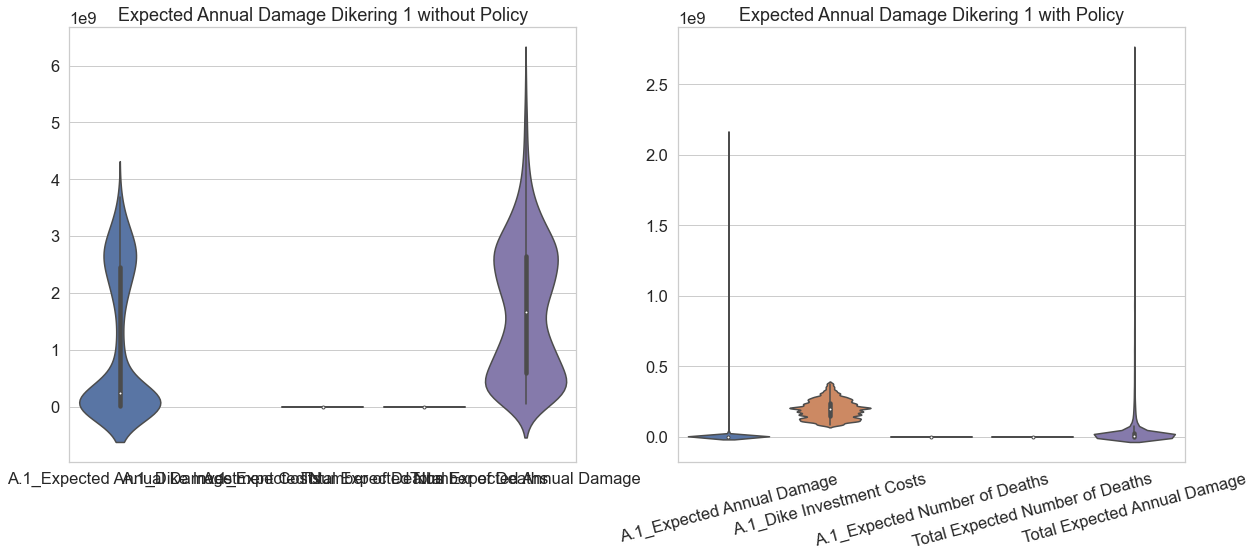

In [43]:
df_policy = df2[df2['Policy'] == 'random']
df_no_policy = df2[df2['Policy'] == 'basecase']

f, axes = plt.subplots(1, 2, figsize=(20,8))
sns.set(style="whitegrid", font_scale=1.5)

sns.violinplot(data=df_no_policy, ax=axes[0], scale='count')

sns.violinplot(data=df_policy, ax=axes[1], scale='count')

plt.xticks(rotation=15)
plt.rcParams["axes.labelsize"] = 18

axes[0].set_title("Expected Annual Damage Dikering 1 without Policy")
axes[1].set_title("Expected Annual Damage Dikering 1 with Policy")

#plt.savefig("../images/basebase_numberofdeathslocations.png")
plt.show()

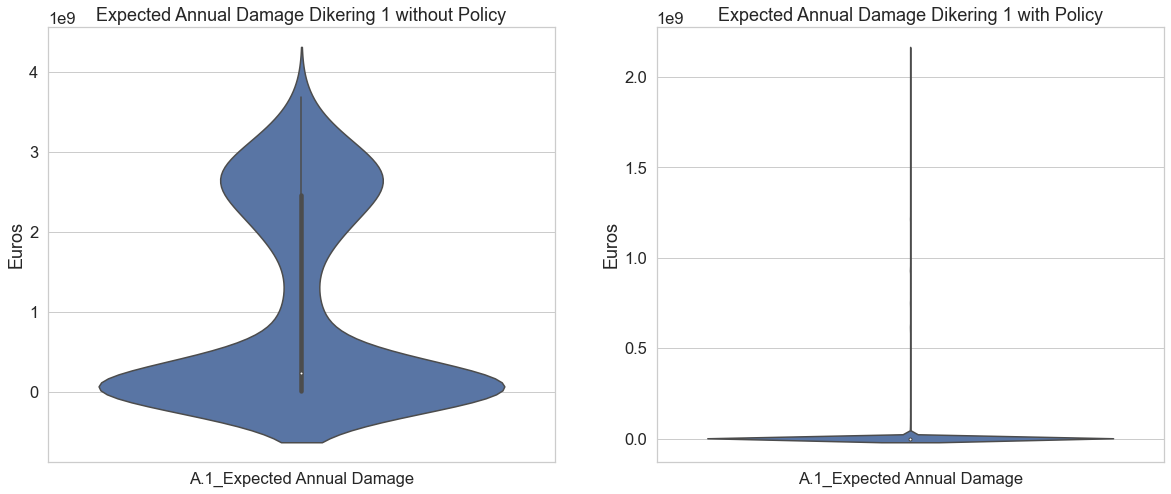

In [33]:
df_policy = df2[df2['Policy'] == 'random']
df_no_policy = df2[df2['Policy'] == 'basecase']

f, axes = plt.subplots(1, 2, figsize=(20,8))
sns.set(style="whitegrid", font_scale=1.5)

sns.violinplot(data=df_no_policy[['A.1_Expected Annual Damage']], ax=axes[0], scale='count')
sns.violinplot(data=df_policy[['A.1_Expected Annual Damage']], ax=axes[1], scale='count')

plt.rcParams["axes.labelsize"] = 18

axes[0].set_title("Expected Annual Damage Dikering 1 without Policy")
axes[1].set_title("Expected Annual Damage Dikering 1 with Policy")
axes[0].set_ylabel('Euros')
axes[1].set_ylabel('Euros')

#plt.savefig("../images/basebase_numberofdeathslocations.png")
plt.show()

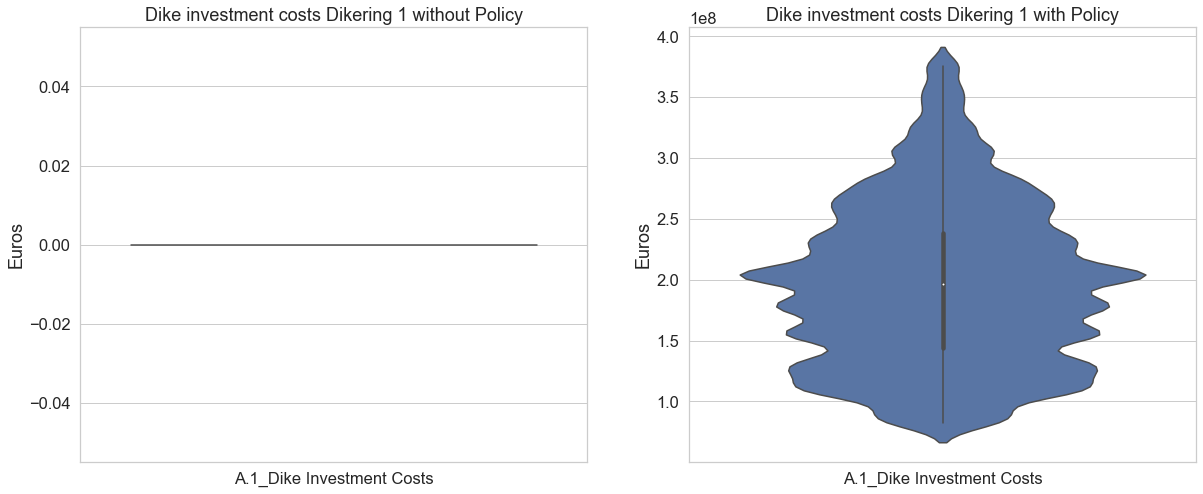

In [34]:
df_policy = df2[df2['Policy'] == 'random']
df_no_policy = df2[df2['Policy'] == 'basecase']

f, axes = plt.subplots(1, 2, figsize=(20,8))
sns.set(style="whitegrid", font_scale=1.5)

sns.violinplot(data=df_no_policy[['A.1_Dike Investment Costs']], ax=axes[0], scale='count')
sns.violinplot(data=df_policy[['A.1_Dike Investment Costs']], ax=axes[1], scale='count')

plt.rcParams["axes.labelsize"] = 18

axes[0].set_title("Dike investment costs Dikering 1 without Policy")
axes[1].set_title("Dike investment costs Dikering 1 with Policy")
axes[0].set_ylabel('Euros')
axes[1].set_ylabel('Euros')

#plt.savefig("../images/basebase_numberofdeathslocations.png")
plt.show()

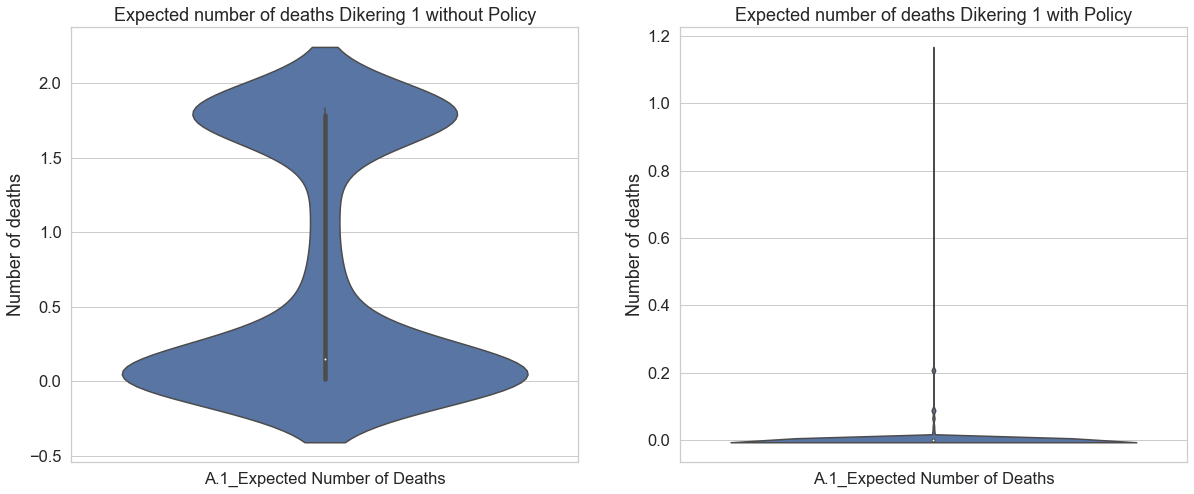

In [35]:
df_policy = df2[df2['Policy'] == 'random']
df_no_policy = df2[df2['Policy'] == 'basecase']

f, axes = plt.subplots(1, 2, figsize=(20,8))
sns.set(style="whitegrid", font_scale=1.5)

sns.violinplot(data=df_no_policy[['A.1_Expected Number of Deaths']], ax=axes[0], scale='count')
sns.violinplot(data=df_policy[['A.1_Expected Number of Deaths']], ax=axes[1], scale='count')

plt.rcParams["axes.labelsize"] = 18

axes[0].set_title("Expected number of deaths Dikering 1 without Policy")
axes[1].set_title("Expected number of deaths Dikering 1 with Policy")
axes[0].set_ylabel('Number of deaths')
axes[1].set_ylabel('Number of deaths')

#plt.savefig("../images/basebase_numberofdeathslocations.png")
plt.show()

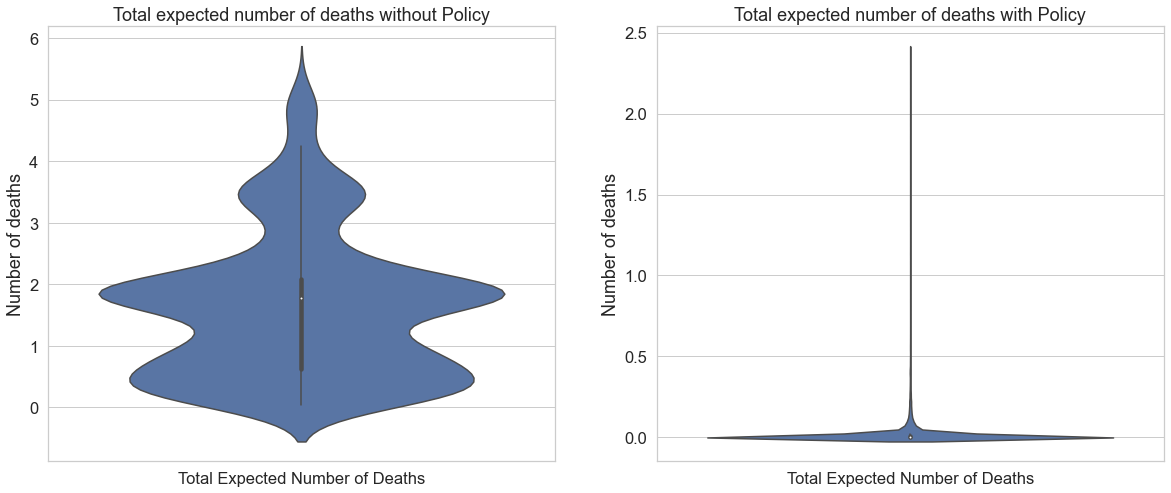

In [36]:
df_policy = df2[df2['Policy'] == 'random']
df_no_policy = df2[df2['Policy'] == 'basecase']

f, axes = plt.subplots(1, 2, figsize=(20,8))
sns.set(style="whitegrid", font_scale=1.5)

sns.violinplot(data=df_no_policy[['Total Expected Number of Deaths']], ax=axes[0], scale='count')
sns.violinplot(data=df_policy[['Total Expected Number of Deaths']], ax=axes[1], scale='count')

plt.rcParams["axes.labelsize"] = 18

axes[0].set_title("Total expected number of deaths without Policy")
axes[1].set_title("Total expected number of deaths with Policy")
axes[0].set_ylabel('Number of deaths')
axes[1].set_ylabel('Number of deaths')

#plt.savefig("../images/basebase_numberofdeathslocations.png")
plt.show()

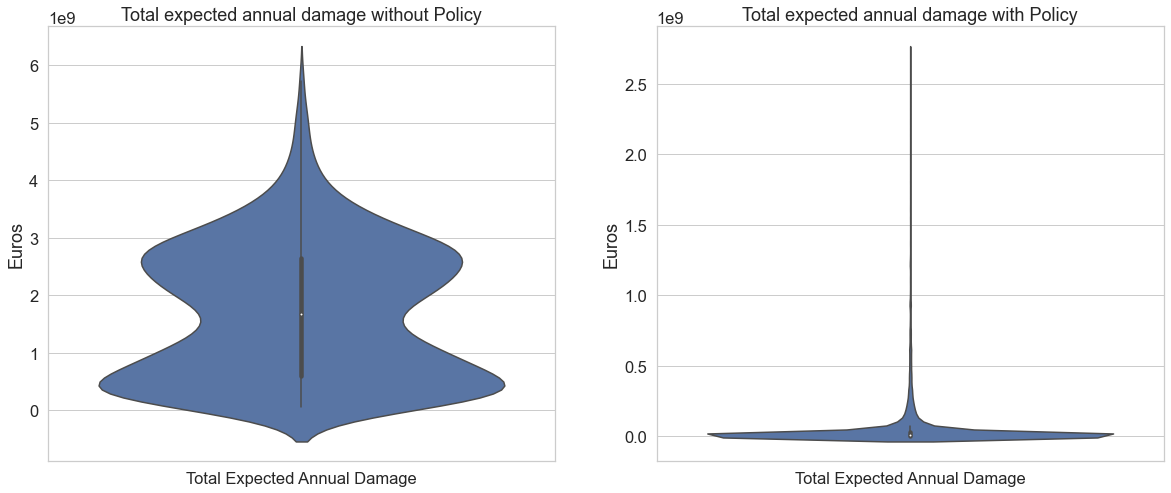

In [37]:
df_policy = df2[df2['Policy'] == 'random']
df_no_policy = df2[df2['Policy'] == 'basecase']

f, axes = plt.subplots(1, 2, figsize=(20,8))
sns.set(style="whitegrid", font_scale=1.5)

sns.violinplot(data=df_no_policy[['Total Expected Annual Damage']], ax=axes[0], scale='count')
sns.violinplot(data=df_policy[['Total Expected Annual Damage']], ax=axes[1], scale='count')

plt.rcParams["axes.labelsize"] = 18

axes[0].set_title("Total expected annual damage without Policy")
axes[1].set_title("Total expected annual damage with Policy")
axes[0].set_ylabel('Euros')
axes[1].set_ylabel('Euros')

#plt.savefig("../images/basebase_numberofdeathslocations.png")
plt.show()

In [ ]:
# dike_lists = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']

In [16]:
a1_damage_count=df_policy["A.1_Expected Annual Damage"][df_policy["A.1_Expected Annual Damage"]>2000000000].count()
a1_damage_count

4

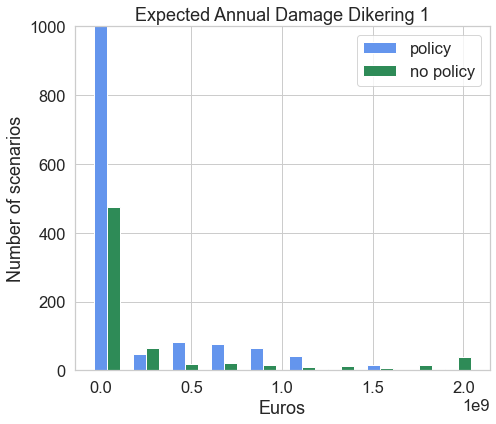

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
#import seaborn
#seaborn.set(style='ticks')

outcomes_of_interest2 = ["A.1_Expected Annual Damage","A.1_Dike Investment Costs",\
                        "A.1_Expected Number of Deaths","Total Expected Number of Deaths",\
                        "Total Expected Annual Damage"]
fig, ax = plt.subplots(1, 1, figsize=(7,6))
a_heights, a_bins = np.histogram(df_policy[["A.1_Expected Annual Damage"]])
b_heights, b_bins = np.histogram(df_no_policy[["A.1_Expected Annual Damage"]], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

policy = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label='policy')
no_policy = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label='no policy')
ax.set_ylim([0,1000])
ax.set_title("Expected Annual Damage Dikering 1")
ax.set_ylabel('Number of scenarios')
ax.set_xlabel('Euros')
plt.legend([policy, no_policy],['policy', 'no policy'])
 
plt.tight_layout()
plt.show()

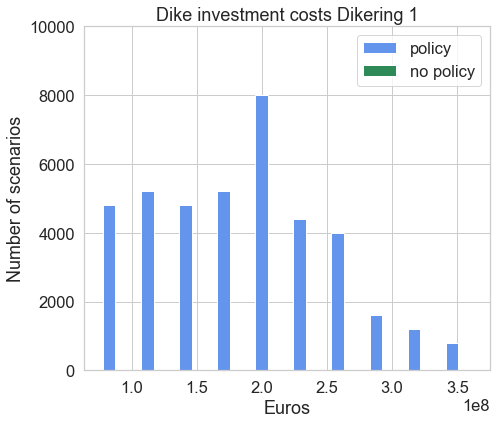

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
a_heights, a_bins = np.histogram(df_policy[["A.1_Dike Investment Costs"]])
b_heights, b_bins = np.histogram(df_no_policy[["A.1_Dike Investment Costs"]], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

policy = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label='policy')
no_policy = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label='no policy')
ax.set_ylim([0,10000])
ax.set_title("Dike investment costs Dikering 1")
ax.set_ylabel('Number of scenarios')
ax.set_xlabel('Euros')
plt.legend([policy, no_policy],['policy', 'no policy'])
    
plt.tight_layout()
plt.show()

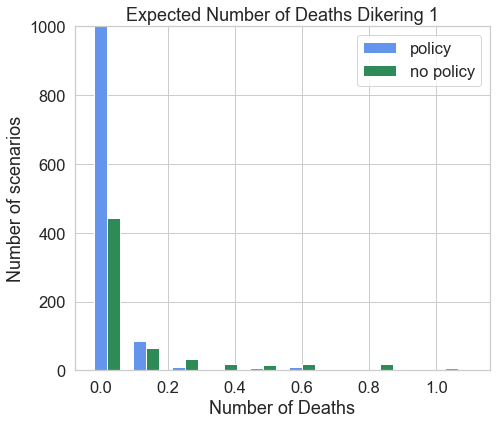

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
a_heights, a_bins = np.histogram(df_policy[["A.1_Expected Number of Deaths"]])
b_heights, b_bins = np.histogram(df_no_policy[["A.1_Expected Number of Deaths"]], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

policy = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label='policy')
no_policy = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label = 'no policy')
ax.set_ylim([0,1000])
ax.set_title("Expected Number of Deaths Dikering 1")
ax.set_ylabel('Number of scenarios')
ax.set_xlabel('Number of Deaths')
plt.legend([policy, no_policy],['policy', 'no policy'])
    
plt.tight_layout()
plt.show()

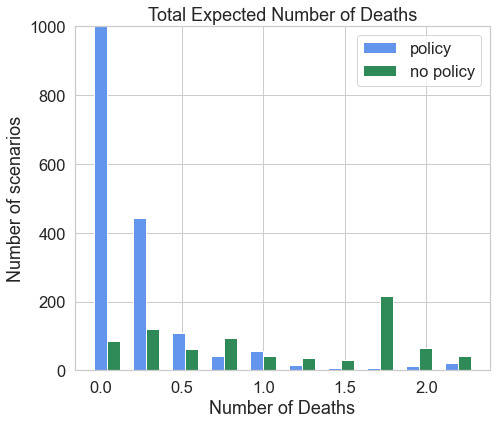

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
a_heights, a_bins = np.histogram(df_policy[["Total Expected Number of Deaths"]])
b_heights, b_bins = np.histogram(df_no_policy[["Total Expected Number of Deaths"]], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

policy = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label='policy')
no_policy = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label='no_policy')
ax.set_ylim([0,1000])
ax.set_title("Total Expected Number of Deaths")
ax.set_ylabel('Number of scenarios')
ax.set_xlabel('Number of Deaths')
plt.legend([policy, no_policy],['policy', 'no policy'])
    
plt.tight_layout()
plt.show()

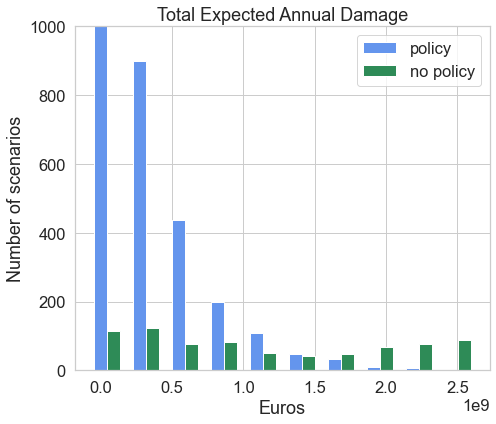

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
a_heights, a_bins = np.histogram(df_policy[["Total Expected Annual Damage"]])
b_heights, b_bins = np.histogram(df_no_policy[["Total Expected Annual Damage"]], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

policy = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label = 'policy')
no_policy = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label='no policy')
ax.set_ylim([0,1000])
ax.set_title("Total Expected Annual Damage")
ax.set_ylabel('Number of scenarios')
ax.set_xlabel('Euros')
plt.legend([policy, no_policy],['policy', 'no policy'])
    
plt.tight_layout()
plt.show()

(0.0, 1000.0)

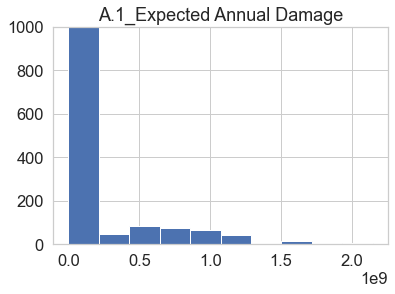

In [19]:
df_policy.hist('A.1_Expected Annual Damage')
plt.ylim(0,1000)

array([[<AxesSubplot:title={'center':'A.1_Expected Annual Damage'}>]],
      dtype=object)

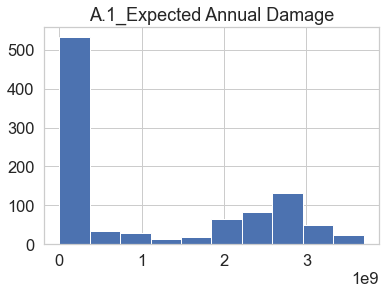

In [20]:
df_no_policy.hist('A.1_Expected Annual Damage')

In [ ]:
# fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

# print("Expected Annual Damage of each dike")
    
# for (i, a) in zip(dike_lists, axes.flatten()):
#     a.hist(df_base_agg[str(i) + "_Expected Annual Damage"])
#     a.set_xlim(left=0)
#     a.set_ylim([0,1000])
#     a.set_title(i)


# plt.tight_layout()
# plt.show()

In [ ]:
# fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

# print("Expected Number of Deaths of each dike")
    
# for (i, a) in zip(dike_lists, axes.flatten()):
#     a.hist(df_base_agg[str(i) + "_Expected Number of Deaths"])
#     a.set_xlim(left=0)
#     a.set_ylim([0,1000])
#     a.set_title(i)


# plt.tight_layout()
# plt.show()